In [7]:
def monitoring(TimeStamp1, TimeStamp2, RTE):
    import sys,os, pdb, sqlite3
    #Check and see if the current working path exists in python system.
    #otherwise add it.
    curr_path = 'd:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
    if curr_path not in sys.path:
        sys.path.append('d:\\Nextcloud\\Thermal Battery Research\\modelling\\python')
        print('Path added!')

    from projdirs import datadir
    from package.optimisation import optimise, load_simparams
    import matplotlib.pyplot as plt 
    import numpy as np
    import pandas as pd
    import os, pdb, sqlite3
    import package.get_NEM_data as gd
    from IPython.display import clear_output
    from datetime import datetime, timedelta

    connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_rolling_forecast.db')
    cursor = connection.cursor()

    cursor.execute("SELECT * FROM storage_value WHERE state=" + '"'+'NSW'+'"')
    data = pd.DataFrame([row for row in cursor.fetchall()])



    data.columns = ['state','date_time', 'sh', 'rte', 'cap', 'loss', 'window',
                        'Pin', 'Pout', 'Q_start', 'Q_end', 'obj']
    data['date_time'] = pd.to_datetime(data['date_time'])
    data.set_index(data['date_time'], inplace=True)
    data = data[data['rte']==RTE]
    return(data.loc[TimeStamp1:TimeStamp2])

monitoring('2010-01-01 05:00:00','2010-01-01 06:00:00', RTE=40)

# Slice =  data.loc[pd.Timestamp('2018-01-01'): pd.Timestamp('2018-12-31')]

# fig, ax1 = plt.subplots(figsize=(16,4))
# ax2 = ax1.twinx()

# ax1.plot(Slice.index, Slice['Q_end'], color='b')
# ax2.step(Slice.index, Slice['Pin'], color='g')
# ax2.step(Slice.index, Slice['Pout'], color='r')
# ax2.set_ylim([-10,60])
# # plt.ylim([-10,60])
# plt.grid()
# plt.show()
# print(gd.load_actual_rrp_at('NSW', pd.Timestamp('2018-01-01 04:00:00')))
# print(50*14500*0.5)
# data['rrp'] = gd.load_actual_rrp_at('NSW', data['date_time'])
# data['obj'] = (data['Pout']-data['Pin'])*0.5*data['rrp']
# data['obj'].sum()
# data.reset_index
# data.drop('rrp',axis=1, inplace=True)
# data = data.reset_index(drop=True)
# plt.close("all")
# data.to_sql( "storage_value", connection, if_exists="replace", index=False)


,state,date_time,sh,rte,cap,loss,window,Pin,Pout,Q_start,Q_end,obj
date_time,,,,,,,,,,,,
2010-01-01 05:00:00,NSW,2010-01-01 05:00:00,10,40,14500,0,46,0.0,0.0,0,0.0,0.0
2010-01-01 05:30:00,NSW,2010-01-01 05:30:00,10,40,14500,0,45,0.0,0.0,0,0.0,0.0
2010-01-01 06:00:00,NSW,2010-01-01 06:00:00,10,40,14500,0,44,0.0,0.0,0,0.0,0.0


In [1]:
import sys,os
    #Check and see if the current working path exists in python system.
    #otherwise add it.
curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added!')
    
from projdirs import datadir
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import package.get_NEM_data as gd
import package.sql_manager as sm

Year = 2010
RTE=40
state = 'SA'
db = 'storage_value_PF_simple_%s.db'%(state)
table = 'storage_value'
cols = [x[0] for x in sm.list_columns(db,table)]
data = sm.get_data(cols,table, db)

print(data[data['date_time']==2018])


Path added!
     state  date_time  sh  rte  loss    cap            SV
1024    SA       2018   2   30     0  14500  5.519210e+06
1025    SA       2018   3   30     0  14500  6.010609e+06
1026    SA       2018   4   30     0  14500  6.265928e+06
1027    SA       2018   5   30     0  14500  6.398587e+06
1028    SA       2018   6   30     0  14500  6.499635e+06
1029    SA       2018   7   30     0  14500  6.573929e+06
1030    SA       2018   8   30     0  14500  6.621012e+06
1031    SA       2018   9   30     0  14500  6.660209e+06
1032    SA       2018  10   30     0  14500  6.692413e+06
1033    SA       2018  11   30     0  14500  6.719301e+06
1034    SA       2018  12   30     0  14500  6.742131e+06
1035    SA       2018  13   30     0  14500  6.762270e+06
1036    SA       2018  14   30     0  14500  6.780296e+06
1037    SA       2018  15   30     0  14500  6.796380e+06
1038    SA       2018  16   30     0  14500  6.810795e+06
1039    SA       2018  17   30     0  14500  6.823835e+06
10

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]
[[ 11.  12.  13.  14.]
 [ 21.  22.  23.  24.]
 [ 31.  32.  33.  34.]
 [ 41.  42.  43.  44.]]


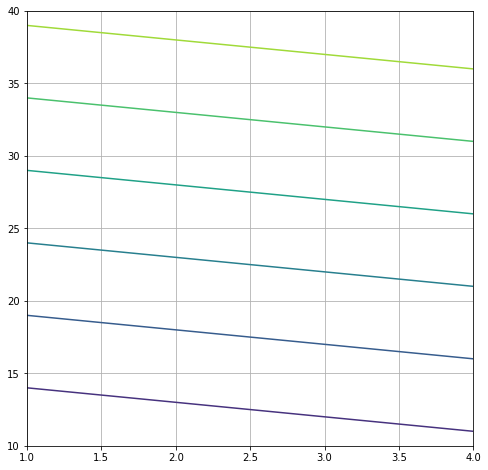

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.close('all')
X = np.arange(1,5,1)
Y = np.arange(10,50,10)
Z = np.zeros((len(Y), len(X)))
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        Z[j,i]= x+y
XX,YY = np.meshgrid(X,Y)
print(XX)
print(YY)
print(Z)
fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1)
ax.contour(XX,YY,Z)
ax.grid()
plt.show()